In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
ratings_col = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("./ml-100k/u.data", header=-1)

ratings.columns = ratings_col
ratings[:5]

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


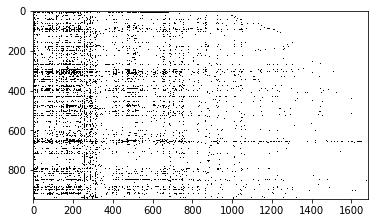

In [4]:
rating_matrix = np.zeros((1+ratings['user_id'].max(), 1+ratings['movie_id'].max()), dtype=int)
rating_matrix[tuple(zip(*ratings[['user_id', 'movie_id']].values))] = 1
plt.imshow(rating_matrix, cmap='Greys', interpolation='nearest')

In [5]:
rating_matrix_2 = np.zeros((1+ratings['user_id'].max(), 1+ratings['movie_id'].max()), dtype=int)
for idx, ele in ratings.iterrows():
    rating_matrix_2[ele.user_id][ele.movie_id] = ele.rating

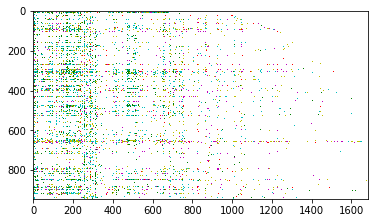

In [6]:
rating_matrix_3 = rating_matrix_2.copy()
rating_matrix_4 = rating_matrix_2.copy()
cmap1 =  mpl.colors.ListedColormap(['w', 'r', 'm', 'y', 'c', 'g'])
plt.imshow(rating_matrix_3, cmap=cmap1, interpolation='nearest')

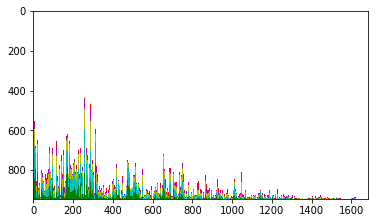

In [7]:
cmap1 =  mpl.colors.ListedColormap(['w', 'r', 'm', 'y', 'c', 'g'])
rating_matrix_3.sort(axis=0)
plt.imshow(rating_matrix_3, cmap=cmap1, interpolation='nearest')

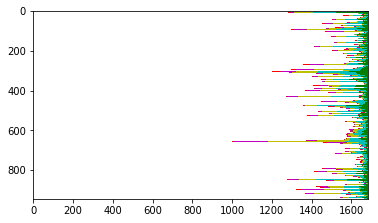

In [8]:
cmap1 =  mpl.colors.ListedColormap(['w', 'r', 'm', 'y', 'c', 'g'])
rating_matrix_4.sort(axis=1)
plt.imshow(rating_matrix_4, cmap=cmap1, interpolation='nearest')

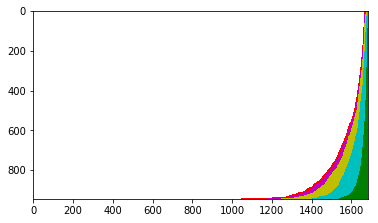

In [9]:
cmap1 =  mpl.colors.ListedColormap(['w', 'r', 'm', 'y', 'c', 'g'])
rating_matrix_2.sort(axis=1)
rating_matrix_2.sort(axis=0)
plt.imshow(rating_matrix_2, cmap=cmap1, interpolation='nearest')

In [11]:
master_dataset = pd.read_csv('master_data.csv', encoding='latin-1')

In [12]:
users = pd.read_table("./ml-100k/u.user", header=-1, encoding="latin-1", sep="|")
users_col = ["user_id", "age", "gender", "occupation", "zip code"]
users.columns = users_col
movies = pd.read_table("./ml-100k/u.item", header=-1, encoding="latin-1", sep="|")
movies_col = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
genres = pd.read_table("./ml-100k/u.genre", header=-1, sep="|")[0]
movies[3] = movies[2]
movies[2] = movies[1].apply(lambda ele: ele[-5:-1])
movies.columns = movies_col

In [13]:
user_movie_id = pd.DataFrame([{'user_id':user_id, 'movie_id':movie_id} for user_id in users['user_id'] for movie_id in movies['movie_id']])
#(3, 1) in user_movie_id, any( (ratings['user_id']==3) & (ratings['movie_id']==1) )
master_dataset_outer = user_movie_id.merge(ratings, on=['user_id', 'movie_id'], how='left').merge(users, on="user_id", how="left").merge(movies, on="movie_id", how="left")
master_dataset_outer.drop('timestamp', axis=1, inplace=True)
#To show that users who didn't rate movies would be in the datset but blank with example user_id=3
master_dataset_outer[master_dataset_outer['user_id']==3][:5]

,movie_id,user_id,rating,age,gender,occupation,zip code,movie_title,release_date,video_release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3364,1,3,NaN,23,M,writer,32067,Toy Story (1995),1995,01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
3365,2,3,NaN,23,M,writer,32067,GoldenEye (1995),1995,01-Jan-1995,...,0,0,0,0,0,0,0,1,0,0
3366,3,3,NaN,23,M,writer,32067,Four Rooms (1995),1995,01-Jan-1995,...,0,0,0,0,0,0,0,1,0,0
3367,4,3,NaN,23,M,writer,32067,Get Shorty (1995),1995,01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
3368,5,3,NaN,23,M,writer,32067,Copycat (1995),1995,01-Jan-1995,...,0,0,0,0,0,0,0,1,0,0


In [14]:
master_dataset_outer['rating'].fillna(-1, inplace=True)
master_dataset_outer['rating_exists'] = master_dataset_outer['rating'] > 0
master_dataset_outer[master_dataset_outer['user_id']==3][314:318]

,movie_id,user_id,rating,age,gender,occupation,zip code,movie_title,release_date,video_release_date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_exists
3678,315,3,-1.0,23,M,writer,32067,Apt Pupil (1998),1998,23-Oct-1998,...,0,0,0,0,0,0,1,0,0,False
3679,316,3,-1.0,23,M,writer,32067,As Good As It Gets (1997),1997,23-Dec-1997,...,0,0,0,0,0,0,0,0,0,False
3680,317,3,2.0,23,M,writer,32067,In the Name of the Father (1993),1993,01-Jan-1993,...,0,0,0,0,0,0,0,0,0,True
3681,318,3,4.0,23,M,writer,32067,Schindler's List (1993),1993,01-Jan-1993,...,0,0,0,0,0,0,0,1,0,True


(<matplotlib.axes._subplots.AxesSubplot at 0x209f548a978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x209f548a978>)

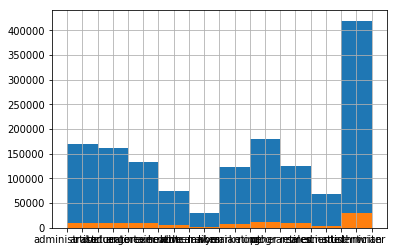

In [15]:
mdo = master_dataset_outer.copy()
mdo[mdo['rating_exists'] == False]['occupation'].hist(), mdo[mdo['rating_exists'] == True]['occupation'].hist()

In [16]:
mdo.to_csv("data_exploded.csv", index_label=False)